<h1><center>VQE and NP Problems on Multiple Quantum Platforms</center></h1>
<h2><center>Project in Quantum Computing - 236991</center></h2>
<h3><center>Technion - Israel Institute of Technology</center></h3>
<h4><center>November 2022</center></h4>



<h5><center>By: Hanna Keller</center></h5>
<h5><center>Supervised by: Prof. Tal Mor, Ms. Ittay Alfassi</center></h5>


# Abstract

In this project I used or implemented the Variational Quantum Eigensolver (VQE) algorithm on several quantum design platforms and tested it on a reduction of an NP-Complete problem (the partitioning problem [6]) to Ising Hamiltonian eigenvalue search. In addition, I added another document that shows how to solve a Multi Agent Path Finding instance (which is NP-complete too [7]) using the functions described in this document and a chain of reductions. The added document can be found 
in the Git repository, at [MAPF/Solving multi agent path finding problem instance using variational quantum eigensolver.ipynb](https://github.com/hannak24/Solving-NP-problems-with-variational-quantum-eigensolver/blob/main/MAPF/Solving%20multi%20agent%20path%20finding%20problem%20instance%20using%20variational%20quantum%20eigensolver.ipynb).

In this document I will present the mathematical background of the project, a comparison of the results from the different platforms and future work suggestions. 

# Mathematical Background

## VQE - The Variational Quantum Eigensolver algorithm

VQE is a hybrid quantum-classical algorithm using the quantum computer only for a classically intractable subroutine and has been shown to be robust against noise, and capable of finding the minimal eigenvalue of an ising model.
Formally stated, given a Hermitian matrix $H$ with an unknown minimum eigenvalue
$\lambda_{min}$ associated with the eigenstate  $|\psi_{min}\text{⟩}$, VQE provides an estimate   $λ_{\theta}$ bounding  $\lambda_{min}$:
<h5><center>$λ_{min}\text{≤}λ_{\theta}\text{≡}\text{⟨}ψ(θ)|H|ψ(θ)\text{⟩}$
 </center></h5>

where  $|ψ(θ)⟩$
  is the eigenstate associated with $λ_{\theta}$
 . By applying a parameterized circuit, represented by  
$U(θ)$, to some arbitrary starting state  $|ψ⟩$, the algorithm obtains an estimate  

<h5><center>$U(θ)|ψ\text{⟩}\text{≡}|ψ(θ)\text{⟩}$ on $|ψ_{min}\text{⟩}$
 </center></h5>
 

   
The estimate is iteratively optimized by a classical controller changing the parameter $θ$, minimizing the expectation value of  $\text{⟨}ψ(θ)|H|ψ(θ)\text{⟩}$.

To complete the specification of VQE, one needs to specify the form of the parameterized wavefunction  $|ψ(θ)\text{⟩}$ , known as the ansatz, as an initial guess approximating $|\psi_{min}\text{⟩}$. Also, the success of the VQE algorithm greatly depends on the classical optimization method, since the algorithm can get stuck in local minima and return not optimal (not minimal) eigenvalue.

One of the advantages of the VQE algorithm is its ability to use the pauli strings constructing an Ising model to efficiently compute the minimal eigenvalue of the model, classicaly intractable due to its exponential size. In this project, I used the VQE algorithm to efficiently compute the minimal eigenvalue of an Ising model representing certain partitioning problem.

## Anzats - The Parametrized Wavefunction

To use the VQE algorithm on a quantum computer, a sistematic approach to varying the ansatz (the initial guess approximating $|ψ_{min}⟩$) is required. VQE does that using a parameterized circuit with a fixed form. The action of the anzats can be represented by the linear transformation $U(θ)$. The anzats is applied to a starting state   $|ψ⟩$ and generates an output state  $U(θ)|ψ⟩≡|ψ(θ)⟩$. 

Iterative optimization over $|ψ(θ)⟩$ aims to yield an expectation value  
<h5><center>$⟨ψ(θ)|H|ψθ)⟩≈\lambda_{min}$. </center></h5> 

$|ψ(θ)⟩$ should be close to $|ψ_{min}⟩$ (where 'closeness' is characterized by either state fidelity, or Manhattan distance).

Anzats with a polynomial number of parameters can only generate transformations to a polynomially sized subspace of all the states in an exponentially sized Hilbert space. Therefore, we need different anzatses. Some anzatses use problem specific knowledge to generate close approximations of $|ψ(θ)⟩$ based on the problem's structure. 
Other anzatses are heuristically designed, without use of the problem domain. In this approach, gates are layered such that the anzats gives good approximations to a lot of states. 

Three essential configurations of the hardware-efficient ansatzes are: the number of qubits in the system, the depth setting, and the entanglement setting. 

A single layer of an anzats specifies a certain combination of single qubit rotations and CX gates. The depth setting says how many times the anzats  repeats this combination. By increasing the depth setting, (at the cost of increasing the number of parameters that must be optimized), the anzats can generate more states. Finally, the entanglement setting selects the configuration, and therefore the number of CX gates. 

In this project, since I don't have prior knowledge about the problem solved by the VQE, I used the EfficientSU2 anzats which is constructed with the RyRz gates, depth of 3 and linear entanglment. It worked well in the Qiskit platform, but gave inaccurate results in the Classiq platform and therefore in Classiq I used an anzats constructed of XRy gates, which returned better results. All the results can be seen 
in the Git repository, at [Platforms/Classiq/Classiq_Solving_The_Partitioning_Problem](https://github.com/hannak24/Solving-NP-problems-with-variational-quantum-eigensolver/blob/main/Platforms/Classiq/Classiq_Solving_The_Partitioning_Problem.ipynb) In the "Results" section.



This is the anzats I used in the Qiskit testing:

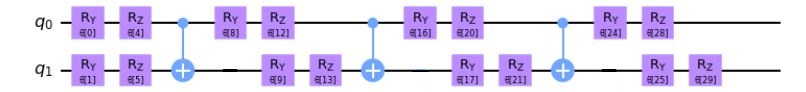

This is the RyRz anzats I tested in the classiq implementation:

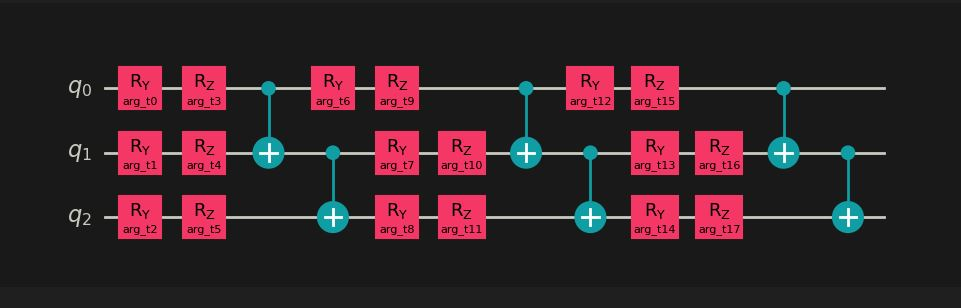)

And this is the X anzats I tested in the Classiq implementation:

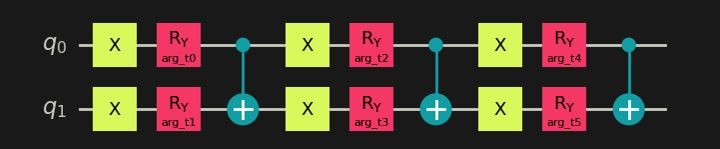

## Optimizer 

The Anzat's parameters must be optimized to minimize the expected value of the target Hamiltonian. It is not simple; quantum hardware has different types of noise, so computation of energy may not necessarily reflect the true objective function. The optimizer should be chosen according to the problem.

A suitable optimizer for optimizing noisy objective functions is the Synchronous Perturbation Stochastic Approximation optimizer (SPSA). SPSA approximates the gradient of the objective function with only two measurements. It does this by perturbing all parameters simultaneously in a random fashion, (as opposed to gradient descent, where each parameter is perturbed independently). When using VQE in a noisy simulator or real hardware, SPSA is recommended as the classic optimizer.

Two optimizers are recommended when noise is not present in the cost function evaluation (for example, when using VQE with a state vector simulator):  the Sequential Least Squares Programming Optimizer (SLSQP) and the Constrained Optimization of Linear Approximation Optimizer (COBYLA). 

In this project, since the VQE was tested mostly on a statevector simulator (both simulator and noiseless environment) due to certain problems with the qasm simulator, I chose to use the COBYLA and the L_BFGS_B optimizers, which are described below.

### COBYLA - Constrained Optimization by Linear Approximation Optimizer

COBYLA is a numerical optimization method for constrained problems where the derivative of the objective function is unknown. It works by iteratively approximating the actual constrained optimization problem with a linear programming problem. In one iteration, an approximate linear programming problem is solved, and gives us candidates for an optimal solution. Candidate solutions are evaluated using the original objective and constraint functions, yielding new data points in the optimization space. This information is used to refine the approximate linear programming problem for the next iteration of the algorithm. When the solution can no longer be improved, the step size is reduced, thereby focusing the search. When the step size is small enough, the algorithm ends.

COBYLA performs only one evaluation of the objective function per optimization iteration (so the number of evaluations is independent of the cardinality of the parameter set). Therefore, if the objective function is noise-free and the number of evaluations is to be minimized, it is recommended to use COBYLA.

### L_BFGS_B - Limited-memory Broyden-Fletcher-Goldfarb-Shanno Bound Optimizer

L_BFGS_B is a Limited-memory BFGS Bound optimizer.

The goal aim of Limited-memory Broyden-Fletcher-Goldfarb-Shanno Bound (L-BFGS-B) is to minimize the value of a differentiable scalar function . This optimizer does not require Hessian.

Like BFGS, L-BFGS is an iterative approach for solving unconstrained, non-linear optimization problems, but it approximates BFGS using a limited amount of memory.  L-BFGS starts with an initial estimate of the optimal value, and iteratively solves the optimization problem of finding better estimates.


# From Partitioning Problem To Finding The Minimal Eigenvalue Problem

In this project, I use the paper ''Ising Formulations of Many NP Problems'' to formulate a NP-complete problem (The partitioning problem) as an Ising model,  and using the VQE find its minimal eigenvalue which represents the minimal difference between the two groups in the optimal partiotioning of the set.

## The Partitioning Problem

Number partitioning asks the following: given a set of N positive numbers   

                            S = {n1, . . . , nN }

is there a partition of this set of numbers into two disjoint subsets R and S − R, such that the sum of the elements in both sets is the same? 

For example, can one divide a set of assets with values 

                              S = {1, 3 , 2, 4} 

fairly between two people? yes! R = {1,4}, S - R = {3,2}.

 This problem is known to be NP-complete

## Ising Model

As it is described in section 1.1 in the paper ''Ising Formulations of Many NP Problems'', a classical Ising model can be written as a quadratic function of a set of N spins, when $s_{i} = ±1$:

<h5><center>  $H(s_{1},s_{2},\ldots,s_{N})=-\sum_{i<j}J_{ij}s_{i}s_{j}-\sum_{i=1}^{N}h_{i}s_{i}$
 </center></h5>



The quantum version of this Hamiltonian is simply:

<h5><center>  $H_{p}=H(\sigma_{1}^{z},\sigma_{2}^{z},\ldots,\sigma_{N}^{z})$
 </center></h5>



When $\sigma_{i}^{z}$ are Z pauli matrices.

## Ising Model formulation of the partitioning problem

According to the explanation in section 2.1 in the paper ''Ising Formulations of Many NP Problems'', the partitioning problem can be phrased as Ising model as follows:

<h5><center> $H=A\left(\sum_{i=1}^{N}n_{i}s_{i}\right)^{2}$
 </center></h5>



When H is an energy function, $s_{i} = ±1$ is an Ising spin variable, N is the size of the numbers set and A > 0 is some positive constant (for simplicity I will scale this parameter later to 1).

If there is a solution to the Ising model with H = 0, then there is a configuration of spins where the sum of the $n_{i}$ for the +1 spins is the same as the sum of the $n_{i}$ for the −1 spins. Thus, if the ground state energy is H = 0, there is a solution to the number partitioning problem.

## Examples:

### S = {1, 1}

So for the set S = {1, 1} , the Ising model equals to:

<h5><center>
$H=A\left(\sum_{i=1}^{N}n_{i}s_{i}\right)^{2}=$
$\left(1\cdot s_{1}+1\cdot s_{2}\right)^{2}=1\cdot s_{1}^{2}+1\cdot s_{1}s_{2}+1\cdot s_{2}s_{1}+1\cdot s_{2}^{2}=$$
1\cdot\sigma_{z}^{1}\sigma_{z}^{1}+1\cdot\sigma_{z}^{1}\sigma_{z}^{2}+1\cdot\sigma_{z}^{2}\sigma_{z}^{1}+1\cdot\sigma_{z}^{2}\sigma_{z}^{2}=$

$
\left(\begin{array}{cccc}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 0 & 0 & 1
\end{array}\right)+\left(\begin{array}{cccc}
1 & 0 & 0 & 0\\
0 & -1 & 0 & 0\\
0 & 0 & -1 & 0\\
0 & 0 & 0 & 1
\end{array}\right)+\left(\begin{array}{cccc}
1 & 0 & 0 & 0\\
0 & -1 & 0 & 0\\
0 & 0 & -1 & 0\\
0 & 0 & 0 & 1
\end{array}\right)+\left(\begin{array}{cccc}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 0 & 0 & 1
\end{array}\right)=\left(\begin{array}{cccc}
4 & 0 & 0 & 0\\
0 & 0 & 0 & 0\\
0 & 0 & 0 & 0\\
0 & 0 & 0 & 4
\end{array}\right)$
 </center></h5>

We can see that the Hamiltonian has 2 eigenvalues that equals to 0, which means, as we expected, that there are 2 possible partitions which satisfy the problem (It doesn't matter in which group each number is, so there are 2 possible ways to devide the set).

### S = {1, 2}

So for the set S = {1, 2} , the Ising model equals to:

<h5><center>
$H=A\left(\sum_{i=1}^{N}n_{i}s_{i}\right)^{2}=$
$\left(1\cdot s_{1}+2\cdot s_{2}\right)^{2}=1\cdot s_{1}^{2}+2\cdot s_{1}s_{2}+2\cdot s_{2}s_{1}+4\cdot s_{2}^{2}=$$
1\cdot\sigma_{z}^{1}\sigma_{z}^{1}+2\cdot\sigma_{z}^{1}\sigma_{z}^{2}+2\cdot\sigma_{z}^{2}\sigma_{z}^{1}+4\cdot\sigma_{z}^{2}\sigma_{z}^{2}=$

$
\left(\begin{array}{cccc}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 0 & 0 & 1
\end{array}\right)+\left(\begin{array}{cccc}
2 & 0 & 0 & 0\\
0 & -2 & 0 & 0\\
0 & 0 & -2 & 0\\
0 & 0 & 0 & 2
\end{array}\right)+\left(\begin{array}{cccc}
2 & 0 & 0 & 0\\
0 & -2 & 0 & 0\\
0 & 0 & -2 & 0\\
0 & 0 & 0 & 2
\end{array}\right)+\left(\begin{array}{cccc}
4 & 0 & 0 & 0\\
0 & 4 & 0 & 0\\
0 & 0 & 4 & 0\\
0 & 0 & 0 & 4
\end{array}\right)=\left(\begin{array}{cccc}
9 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 0 & 0 & 9
\end{array}\right)$
 </center></h5>

We can see that the Hamiltonian has no eigenvalues that equals to 0, which means, as we expected, that a partition that satisfies the problem doesn't exist. However, we still can learn something from the minimal eigenvalue: It equals to the minimal possible difference between the parts in all the partitions. In our case, the set S = {1,2} could be divided to 4 possible partitions:

<h5><center>({1},{2}), ({2},{1}),({1,2},{}),({},{2,1}) </center></h5>.
The minimal difference between the parts of the partitioning occurs in two partitions (({1},{2}), ({2},{1})) and equals to 1 $=>$ the squared root of our minimal eigenvalue.

### S = {1, 2, 3}

So for the set S = {1, 2} , the Ising model equals to:

<h5><center>
$H=A\left(\sum_{i=1}^{N}n_{i}s_{i}\right)^{2}=\left(1\cdot s_{1}+2\cdot s_{2}+3\cdot s_{3}\right)^{2}=$

$n_{1}\cdot n_{1}\cdot s_{1}^{2}+2\cdot n_{1}\cdot n_{2}\cdot s_{1}s_{2}+2\cdot n_{1}\cdot n_{3}\cdot s_{1}s_{3}+n_{2}\cdot n_{2}\cdot s_{2}^{2}+2\cdot n_{2}\cdot n_{3}\cdot s_{2}s_{3}+n_{3}\cdot n_{3}\cdot s_{3}^{2}=$

$1\cdot s_{1}^{2}+4\cdot s_{1}s_{2}+6\cdot s_{1}s_{3}+4\cdot s_{2}^{2}+12\cdot s_{2}s_{3}+9\cdot s_{3}^{2}=$

<h5><center>$
\left(\begin{array}{cccccccc}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1
\end{array}\right)+\left(\begin{array}{cccccccc}
4 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 4 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & -4 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & -4 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & -4 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & -4 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 4 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 4
\end{array}\right)+\left(\begin{array}{cccccccc}
6 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & -6 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 6 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & -6 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & -6 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 6 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & -6 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 6
\end{array}\right)+\left(\begin{array}{cccccccc}
4 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 4 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 4 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 4 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 4 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 4 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 4 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 4
\end{array}\right)+\left(\begin{array}{cccccccc}
12 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & -12 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & -12 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 12 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 12 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & -12 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & -12 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 12
\end{array}\right)+\left(\begin{array}{cccccccc}
9 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 9 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 9 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 9 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 9 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 9 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 9 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 9
\end{array}\right)
=\left(\begin{array}{cccccccc}
36 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 4 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 16 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 16 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 4 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 36
\end{array}\right)$
 </center></h5>

We can see that the Hamiltonian has 2 eigenvalues that equals to 0, which means, as we expected, that there are 2 possible partitions which satisfy the problem (It doesn't matter in which group each number is, so there are 2 possible ways to devide the set).

# Project 

In this project I used the VQE algorithm on several quantum design platforms and tested it on a reduction of an NP-Complete problem (the partitioning problem) to Ising Hamiltonian eigenvalue search. In all the platforms, I initially tested my solution on small 2-qubit problems, both solvable and unsolvable, and then generalized my code to N-qubit solution and tested it on relatively large problem sets.
All the exact results of the work can be found in the 
in the Git repository, at 

[Platforms/Classiq/Classiq_Solving_The_Partitioning_Problem](https://github.com/hannak24/Solving-NP-problems-with-variational-quantum-eigensolver/blob/main/Platforms/Classiq/Classiq_Solving_The_Partitioning_Problem.ipynb), 

 [Platforms/Classiq/Classiq_large_Problems](https://github.com/hannak24/Solving-NP-problems-with-variational-quantum-eigensolver/blob/main/Platforms/Classiq/Classiq_large_problems.ipynb),
 
 
 [Platforms/Qiskit/Qiskit_Solving_The_Partitioning_Problem](https://github.com/hannak24/Solving-NP-problems-with-variational-quantum-eigensolver/blob/main/Platforms/Qiskit/Qiskit_Solving_The_Partitioning_Problem.ipynb),
 
[Platforms/Qiskit/Qiskit_large_Problems](https://github.com/hannak24/Solving-NP-problems-with-variational-quantum-eigensolver/blob/main/Platforms/Qiskit/qiskit_large_problems.ipynb),
 
 In the "Results" sections.

## Results

I ran my code on 72 partitioning problems, 36 solvable and 36 unsolvable (4 problems for each number of qubits, to test a variety of problems). For each problem I measured the deviation of the computed minimal eigenvalue by the VQE from the desired result (the real minimal eigenvalue).
In the graphs below, I show the average deviation from the desired result for each number of qubits in the partitioning problem.

### Qiskit

All the problems were tested using the aer_statevector simulator and l_bfgs_b optimizer.

#### Solvable Problems

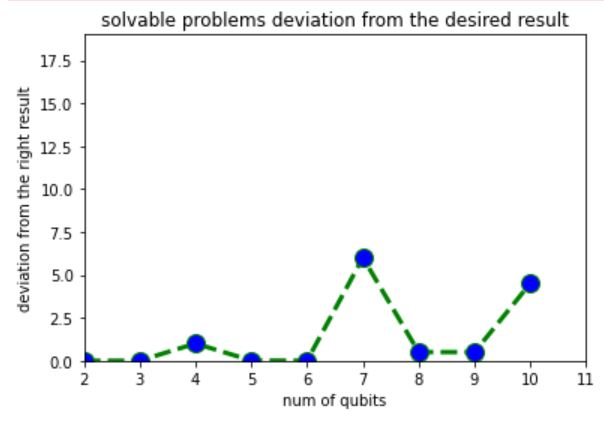

#### Unsolvable Problems

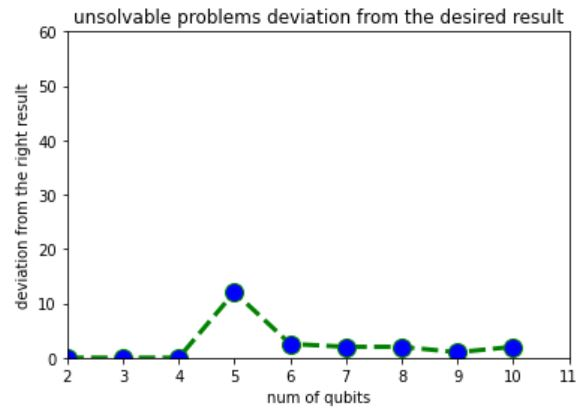

### Classiq

All the problems were tested using the aer_statevector simulator and cobyla optimizer.

#### Solvable Problems

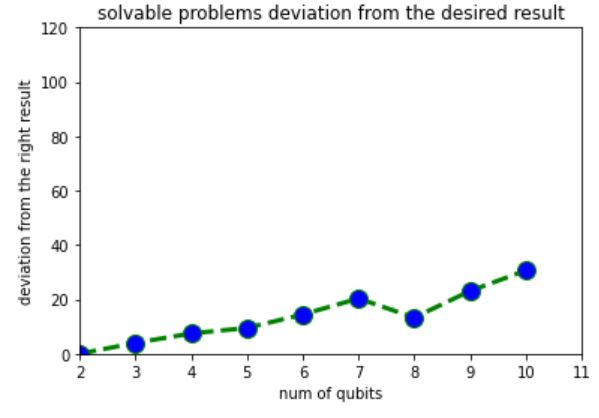

#### Unsolvable Problems

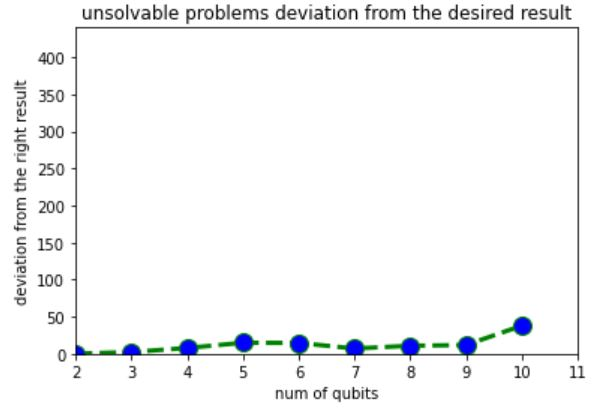

### Discussion

We can see that for a small amount of qubits the VQE algorithm gives accurate results, but as the problems get bigger and contain more qubits the VQE looses its accuracy and deviate more and more from the right results.

There can be several possible explenations to this inaccuracy. This can be explained by a bug in my code, of course. Since I'm using a statevector simulator and not real quantum hardware, I highly doubt that a noise is to blame. The most likely reason to the graph's behavior, in my opinion, is that it's stuck in local minima. This theory is strengthened by the "outlier" in the second graphs 5 qubit point.



Looking closely on the two first problems in the 5 qubits unsolvable problems (Qiskit):

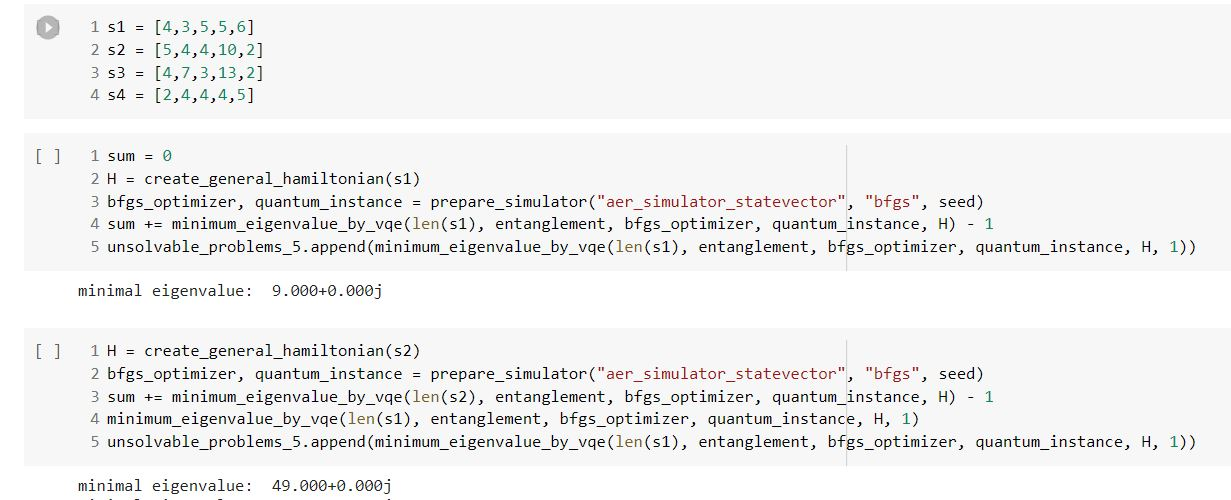

I noticed that in the first problem the VQE returned 9, which is the squared value of 3, the second big eigenvalue of the problem's Hamiltonian.
The same behavior repeats in the second problem; The VQE returns 49, which is the squared value of 7, the second big eigenvalue of the problem's Hamiltonian - its optimizer was stuck on local minimas.

Some practical knowledge I gained during the work on the different platforms also worths mentioning:



*   Qiskit and Classiq have a built in VQE module, which makes the work with them much easier then with Amazon Braket.

*   Qiskit has very convinient documentations and tutorials, while Classiq and Amazon Braket have much smaller and not intuitive documentations, which make Qiskit much more user-friendly.

* Classiq's installation process was very unclear and therefore long.

* Classiq returns error when I tried to use it with the qasm simulator. Also Qiskit returned inaccurate results when I tried to use the qasm simulator with the l_bgfs_b optimizer.

* In Qiskit platform, the COBYLA optimizer worked better (more accurate) with the qasm simulator, while the L_BFGS_B optimizer worked better with the aer_statevector simulator.








#Approximating the right answer with "wrong" result

Let's suppose that due to some noise in the simulator, the VQE returned wrong result (returned minimal eigenvalue > 0 when actually it equals to zero).
Can we still try to approximate the right value?
The answer is yes!

In Qiskit implementation, VQE returns the state eigenvector along with the minimal eigenvalue. This Eigenvector is constructed from the computational basis vectors. Qiskit performs measurment in the computational basis and returns the counts of the states in the Histogram.
Each computational basis vector corresponds to one (or more) eigenvalues, and therefore, to a valid solution.
We can take the most probable basis vector and its corresponding eigenvalue, find the corresponding partititioning, and check wether it's the right answer.

## Example

Let's take for example the solvable problem [1,1]. The Hamiltonian of this problem (as explained above in the examples section) is simply:

\begin{array}{cccc}
4 & 0 & 0 & 0\\
0 & 0 & 0 & 0\\
0 & 0 & 0 & 0\\
0 & 0 & 0 & 4
\end{array}
 </center></h5>

I tried solving this problem with the VQE and got bad results:

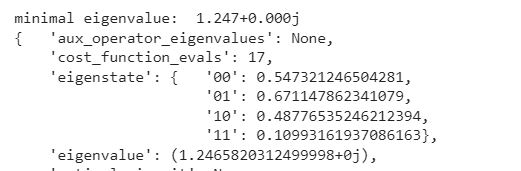

The VQE returned the wrong minimum value 1.247 (instead of 0). 
But we can try and check this answer by finding the most probable basis vector, 
in our case '01'. The eigenvalue essociated with '01' is... 0! Hurray!

# Open Questions

This project was a great experience, but still many questions stay open for future investigation:



*   In the current implementation, my code can't be used for solving real life large NP-Complete problems (such as the MAPF problem), because of the inaccuracy of the results. If my assumption is right, and the problem is that the optimizer gets stuck on local minimas, can an optimizer (and its parameters) be chosen automatically to avoid the issue? Can Machine Learning be used to adjust the optimizer's parameters?


*   The VQE algorithm returns the square of the minimal eigenvalue of the hamiltonian representing the problem, which, as I stated before, represents the difference between the sum of the subsets of the optimal partitioning of the partitioning problem. But can the partitioning itself (which number in the original set belongs to which subset) be concluded from the VQE algorithm results? finding out which partition belongs to which eigenvalue is tricky - (just computing the partitions by order using the eigenvalues is as hard as the original problem because of the exponential amount of the eigenvalues).
Can a partition be calculated based only on the computed eigenvalue and its position in the Hamiltonian diagonal?




# References

1.	Peruzzo, A., McClean, J., Shadbolt, P., Yung, M.H., Zhou, X.Q., Love, P.J., Aspuru-Guzik, A. and O’brien, J.L., 2014. A variational eigenvalue solver on a photonic quantum processor. Nature communications, 5(1), pp.1-7.
2.	Lucas, Andrew. “Ising Formulations of Many NP Problems.” Frontiers in Physics 2 (2014). https://doi.org/10.3389/fphy.2014.00005.
3.	https://en.wikipedia.org/wiki/Ising_model
4.	https://en.wikipedia.org/wiki/Partition_problem
5.	https://qiskit.org/textbook/ch-applications/vqe-molecules.html
6. “Reducibility among combinatorial problems” by R.M. Karp. , in Complexity of Computer Computations, ed. R.E. Miller, J.W. Thatcher and J.D. Bohlinger, 85 (1972).
7. “On the Computational Complexity of Multi-Agent Pathfinding on Directed Graphs” by Bernhard Nebel.
